In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
YEAR = 2018
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdpReset = pd.read_excel('WB GDP 2019.xls')
#viewing the first five and last five
LIFE_INDICATOR = 'SP.DYN.LE00.IN'
lifeReset = pd.read_excel('WB LE 2019.xls')
lifeReset.head()

,Country Name,Year,SP.DYN.LE00.IN
0,Aruba,2018,76.152
1,Afghanistan,2018,64.486
2,Angola,2018,60.782
3,Albania,2018,78.458
4,Andorra,2018,NaN


In [3]:
lifeReset.tail()

,Country Name,Year,SP.DYN.LE00.IN
259,Kosovo,2018,72.243902
260,"Yemen, Rep.",2018,66.096000
261,South Africa,2018,63.857000
262,Zambia,2018,63.510000
263,Zimbabwe,2018,61.195000


In [7]:
gdpCountries = gdpReset.dropna()
lifeCountries = lifeReset.dropna()

In [8]:
gdpCountries

,Country Name,Year,NY.GDP.MKTP.CD
1,Afghanistan,2018,1.835388e+10
2,Angola,2018,1.013532e+11
3,Albania,2018,1.514702e+10
4,Andorra,2018,3.218316e+09
5,Arab World,2018,2.771384e+12
...,...,...,...
259,Kosovo,2018,7.942962e+09
260,"Yemen, Rep.",2018,2.348627e+10
261,South Africa,2018,3.682889e+11
262,Zambia,2018,2.631214e+10


In [9]:
lifeCountries

,Country Name,Year,SP.DYN.LE00.IN
0,Aruba,2018,76.152000
1,Afghanistan,2018,64.486000
2,Angola,2018,60.782000
3,Albania,2018,78.458000
5,Arab World,2018,71.806825
...,...,...,...
259,Kosovo,2018,72.243902
260,"Yemen, Rep.",2018,66.096000
261,South Africa,2018,63.857000
262,Zambia,2018,63.510000


In [10]:
def roundToMillions (value):
    return round(value / 1000000)

def usdToGBP (usd):
    return usd / 1.564768

GDP = 'GDP (£m)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP).apply(roundToMillions)
gdpCountries.head()

,Country Name,Year,NY.GDP.MKTP.CD,GDP (£m)
1,Afghanistan,2018,1.835388e+10,11729
2,Angola,2018,1.013532e+11,64772
3,Albania,2018,1.514702e+10,9680
4,Andorra,2018,3.218316e+09,2057
5,Arab World,2018,2.771384e+12,1771115


In [11]:
COUNTRY = 'Country Name'
headings = [COUNTRY, GDP]
gdpClean = gdpCountries[headings]
gdpClean.head()

,Country Name,GDP (£m)
1,Afghanistan,11729
2,Angola,64772
3,Albania,9680
4,Andorra,2057
5,Arab World,1771115


In [12]:
LIFE = 'Life expectancy (years)'
lifeCountries[LIFE] = lifeCountries[LIFE_INDICATOR].apply(round)
headings = [COUNTRY, LIFE]
lifeClean = lifeCountries[headings]
lifeClean.head()

,Country Name,Life expectancy (years)
0,Aruba,76
1,Afghanistan,64
2,Angola,61
3,Albania,78
5,Arab World,72


In [15]:
gdpVsLife = pd.merge(gdpClean, lifeClean, on=COUNTRY, how='inner')
gdpVsLife.head()

,Country Name,GDP (£m),Life expectancy (years)
0,Afghanistan,11729,64
1,Angola,64772,61
2,Albania,9680,78
3,Arab World,1771115,72
4,United Arab Emirates,269826,78


In [21]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLife[GDP]
lifeColumn = gdpVsLife[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is' , correlation)
if pValue < 0.05:
    print('It is statistically significant')
else: 
    print('It is not statistically significant')

The correlation is 0.3307100000921487
It is statistically significant


<AxesSubplot:xlabel='GDP (£m)', ylabel='Life expectancy (years)'>

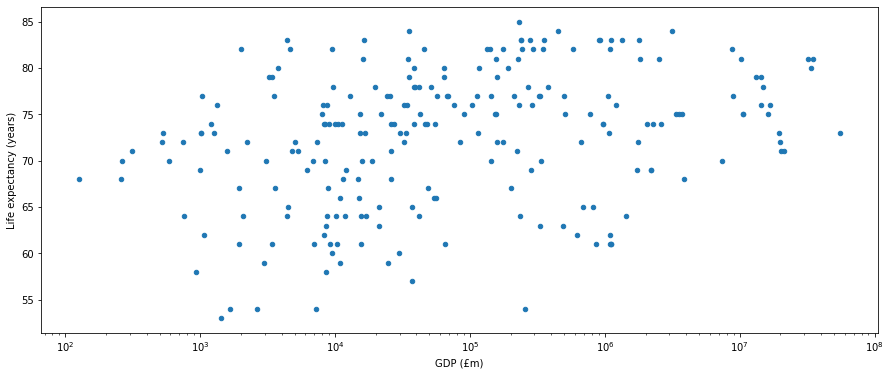

In [27]:
%matplotlib inline 
gdpVsLife.plot(x=GDP,  y=LIFE, kind='scatter' , grid= False, logx=True, figsize=(15,6))

In [30]:
gdpVsLife.sort_values(GDP).head(20)

,Country Name,GDP (£m),Life expectancy (years)
110,Kiribati,126,68
69,"Micronesia, Fed. Sts.",257,68
192,Sao Tome and Principe,263,70
209,Tonga,313,71
222,St. Vincent and the Grenadines,518,72
226,Samoa,525,73
224,Vanuatu,585,70
79,Grenada,747,72
40,Comoros,753,64
76,Guinea-Bissau,932,58


In [29]:
gdpVsLife.sort_values(LIFE).head(20)

,Country Name,GDP (£m),Life expectancy (years)
29,Central African Republic,1419,53
126,Lesotho,1646,54
199,Chad,7183,54
186,Sierra Leone,2611,54
154,Nigeria,253833,54
35,Cote d'Ivoire,37074,57
77,Equatorial Guinea,8486,58
76,Guinea-Bissau,932,58
36,Cameroon,24728,59
140,Mali,10909,59
